In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from peakutils import baseline
from scipy.signal import savgol_filter
from numpy.polynomial.polynomial import Polynomial
from scipy.ndimage import gaussian_filter1d


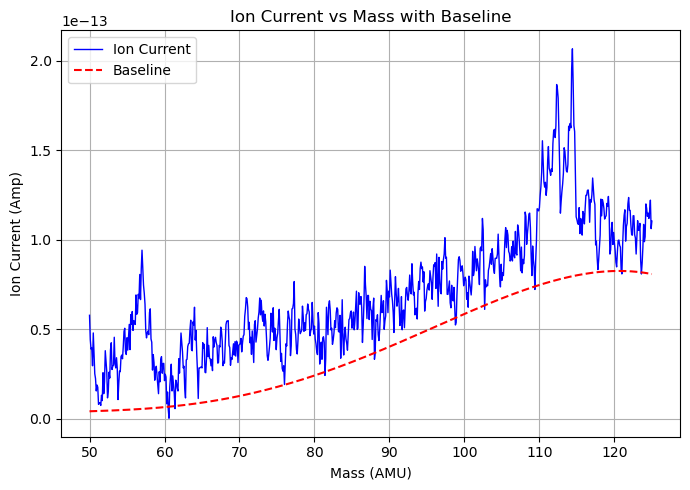

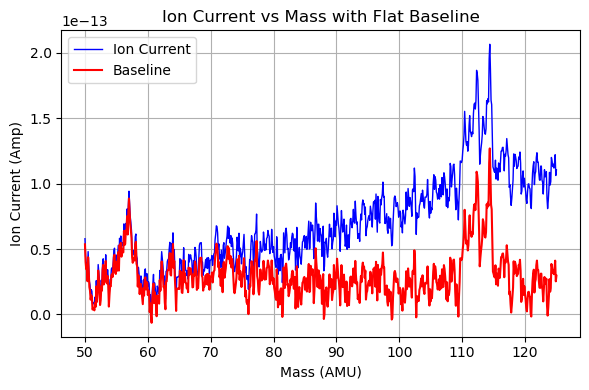

In [172]:

TEST_3 = pd.read_csv("DATA 2 TEST 1(AMP VS AMU).txt", skiprows=25, header=0)

mass = TEST_3.iloc[:,0]
ion_current = TEST_3.iloc[:,1]


mass = np.array(TEST_3.iloc[:,0])
ion_current = np.array(TEST_3.iloc[:,1])

deg = 5
bl = baseline(ion_current, deg=deg)
flat_bl_ion_current = ion_current - bl


plt.figure(figsize=(7, 5))
plt.plot(mass, ion_current, color='blue', linewidth=1, label='Ion Current')
plt.plot(mass, bl, color='red', linestyle='--', linewidth=1.5, label='Baseline')
plt.title('Ion Current vs Mass with Baseline')
plt.xlabel('Mass (AMU)')
plt.ylabel('Ion Current (Amp)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(mass, ion_current, color='blue', linewidth=1, label='Ion Current')
plt.plot(mass, flat_bl_ion_current, color='red', linewidth=1.5, label='Baseline')
plt.title('Ion Current vs Mass with Flat Baseline')
plt.xlabel('Mass (AMU)')
plt.ylabel('Ion Current (Amp)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



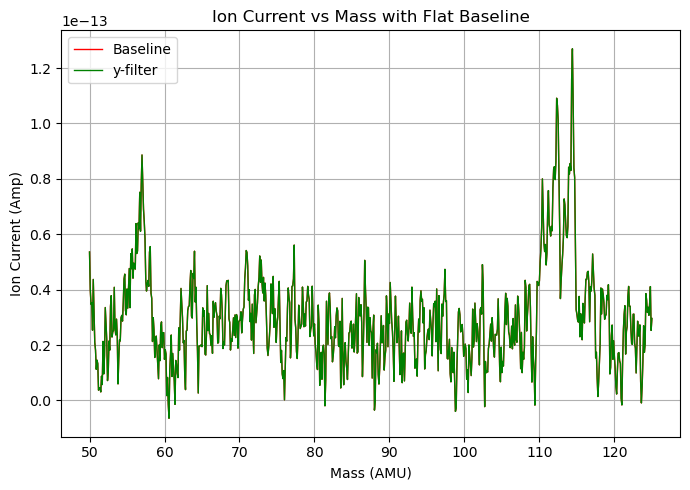

In [174]:
smoothed_ion_current = savgol_filter(flat_bl_ion_current, window_length = 3, polyorder = 2)

plt.figure(figsize=(7, 5))
plt.plot(mass, flat_ion_current, color='red',  linewidth=1, label='Baseline')
plt.plot(mass, smoothed_ion_current, color='green', linewidth=1, label='y-filter')
plt.title('Ion Current vs Mass with Flat Baseline')
plt.xlabel('Mass (AMU)')
plt.ylabel('Ion Current (Amp)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

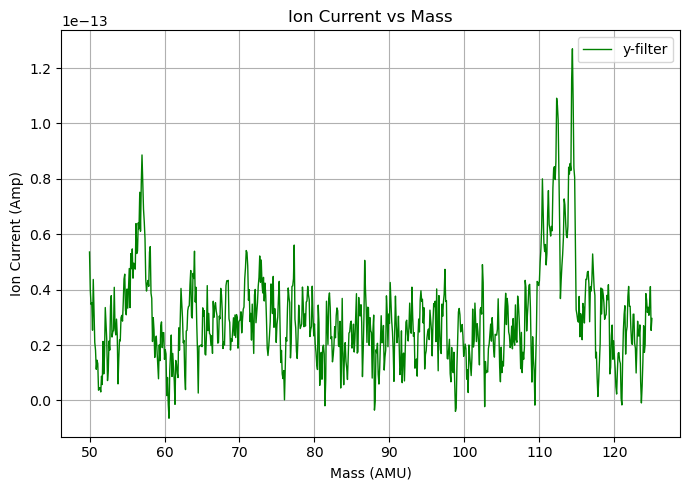

In [178]:
smoothed_ion_current = savgol_filter(flat_bl_ion_current, window_length = 3, polyorder = 2)

plt.figure(figsize=(7, 5))
plt.plot(mass, smoothed_ion_current, color='green', linewidth=1, label='y-filter')
plt.title('Ion Current vs Mass')
plt.xlabel('Mass (AMU)')
plt.ylabel('Ion Current (Amp)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [127]:

mass_min = 65
mass_max = 100


ion_current_values_in_range = []
for i in range(len(mass)):
    if mass_min <= mass[i] <= mass_max:
        ion_current_values_in_range.append(ion_current[i])


if ion_current_values_in_range:
    average_ion_current = sum(ion_current_values_in_range) / len(ion_current_values_in_range)
    print(f"The average of ion current for mass between {mass_min} and {mass_max} is: {average_ion_current}")
    print()
else:
    print(f"No ion_current-values found for mass between {mass_min} and {mass_max}.")
    print()


new_ion_current = flat_bl_ion_current - average_ion_current

The average of ion current for mass between 65 and 100 is: 5.6077920227920244e-14



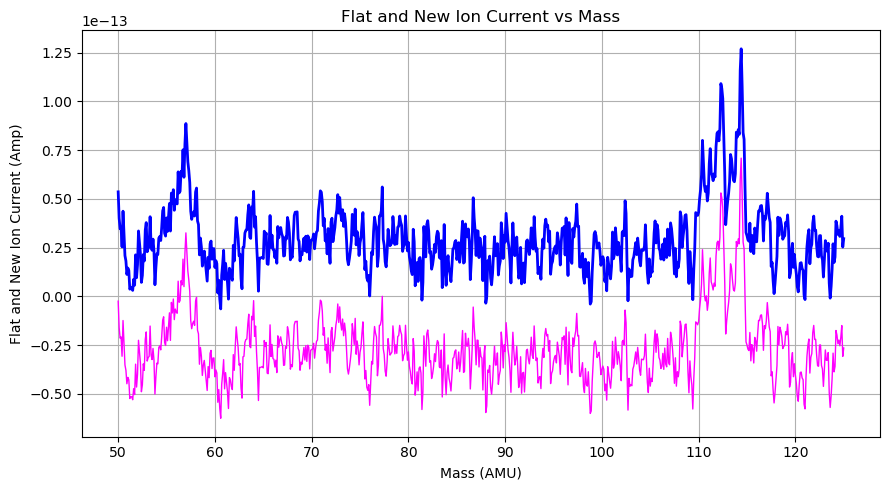

In [137]:
plt.figure(figsize=(9, 5))
plt.plot(mass, new_ion_current, color='magenta', linewidth=1, label='New')
plt.plot(mass, flat_bl_ion_current, color='blue', linewidth=2, label='Raw')

# Labels and grid
plt.title('Flat and New Ion Current vs Mass')
plt.xlabel('Mass (AMU)')
plt.ylabel('Flat and New Ion Current (Amp)')
plt.grid(True)
plt.tight_layout()
plt.show()

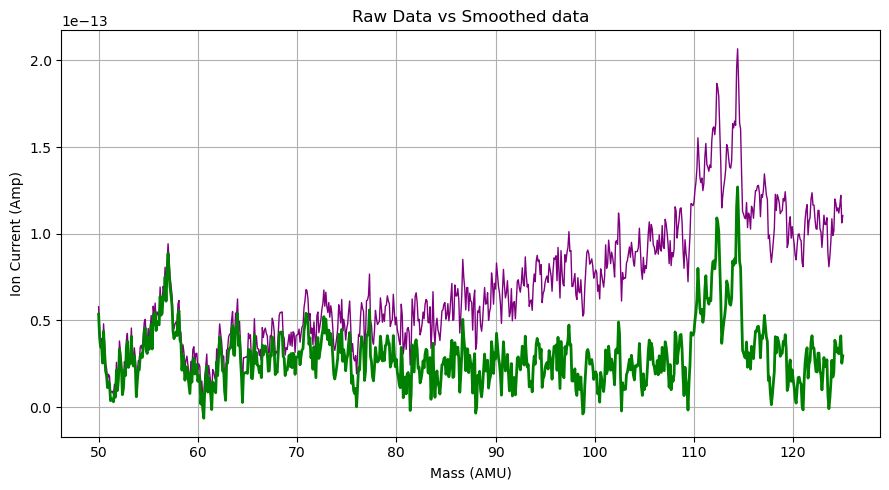

In [135]:
from scipy.ndimage import minimum_filter1d
baseline = minimum_filter1d(smoothed_ion_current, size=50)
baseline_corrected = smoothed_ion_current - baseline

plt.figure(figsize=(9, 5))
plt.plot(mass, ion_current, color='purple', linewidth=1, label='Raw Data')
plt.plot(mass, smoothed_ion_current, color='green', linewidth=2, label='Smoothed Data')
plt.title('Raw Data vs Smoothed data')
plt.xlabel('Mass (AMU)')
plt.ylabel('Ion Current (Amp)')
plt.grid(True)
plt.tight_layout()
plt.show()